# Week 9

The number of nodes in the graph is Graph with 82 nodes and 161 edges.
Calculated probability p: 0.04878048780487805


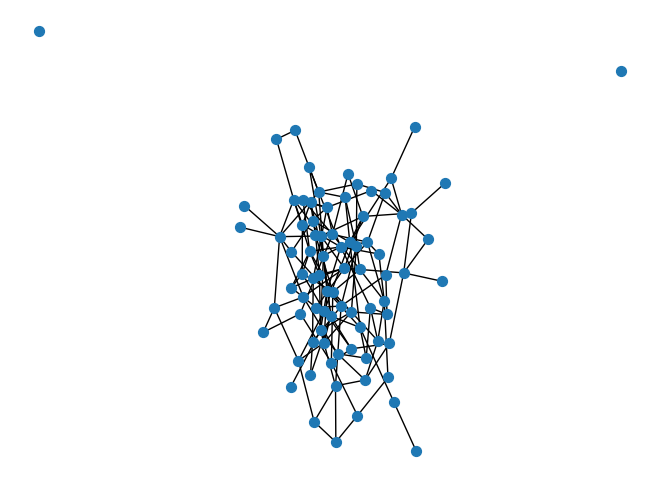

In [81]:
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

#IMPORTING DATABASE
edges_filename = "edges.csv"
nodes_filename = "nodes.csv"

df_edges = pd.read_csv(edges_filename)
df_nodes = pd.read_csv(nodes_filename)

N = G.number_of_nodes()
print('The number of nodes in the graph is ' + str(G) + '.' )
N = len(df_nodes)
E = len(df_edges)
p = 2 * E / (N * (N - 1))  #expected density = p

print(f"Calculated probability p: {p}")

G_ER= nx.erdos_renyi_graph(N,p)

# Circular plot
nx.draw(G_ER,node_size=50)

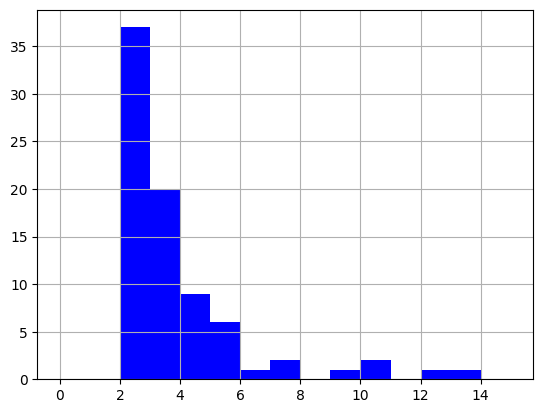

In [82]:
degree=[G.degree(n) for n in G.nodes()] 
plotting = plt.hist(degree, bins=range(16),facecolor='blue')  #histogram of the date set data_centralities
plt.grid(True)
plt.show()

### a) PA by hand (using only basic functions such that 1 nodes appear per stage and creates m links) 


In [83]:

def preferential_attachment(N, m):
    # Start with an initial graph of m nodes
    G = nx.complete_graph(m)

    for new_node in range(m, N):
        # Calculate the total degree of the existing graph
        total_degree = sum(dict(G.degree()).values())

        # Probabilities for each node to be connected to the new node
        prob_conn = [G.degree(node) / total_degree for node in G.nodes()]

        # Choose m nodes based on their degree probability
        nodes_to_connect = np.random.choice(G.nodes(), size=m, replace=False, p=prob_conn)

        # Add the new node and connect it to the selected nodes
        G.add_node(new_node)
        for node in nodes_to_connect:
            G.add_edge(new_node, node)

    return G



### b) my graph average degree

3.951219512195122


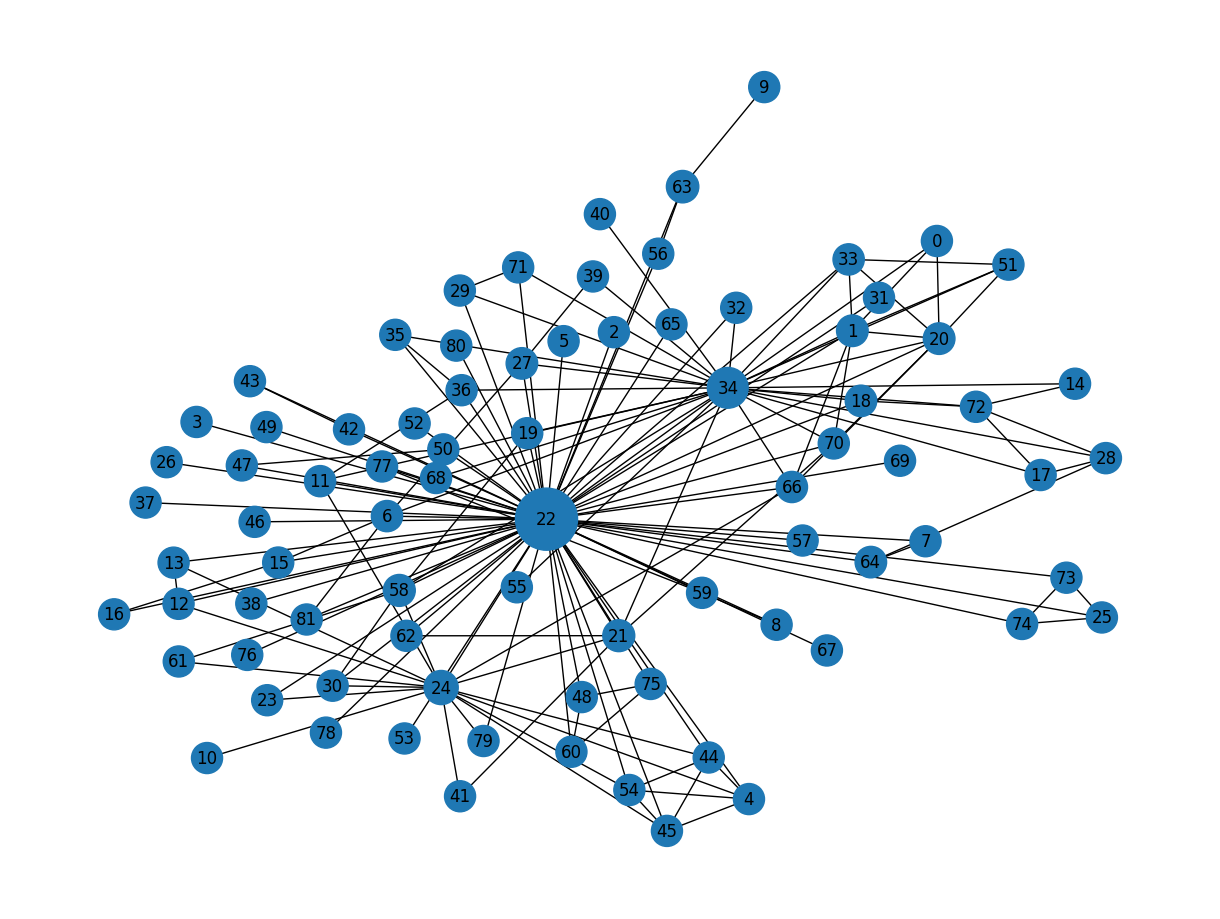

In [84]:
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

edges_filename = "edges.csv"
nodes_filename = "nodes.csv"

df_edges = pd.read_csv(edges_filename)
df_nodes = pd.read_csv(nodes_filename)

G_my = nx.from_pandas_edgelist(df_edges, '# source', ' target')

for index, row in df_nodes.iterrows():
    node = row['# index']
    if node in G_my:
        G_my.nodes[node][' label'] = row[' label']
        G_my.nodes[node][' viz'] = eval(row[' viz']) 

plt.figure(figsize=(12, 9))
sizes = [G_my.nodes[node][' viz']['size'] * 100 for node in G_my.nodes()] 
positions = {(node): (G_my.nodes[node][' viz']['position']['x'], G_my.nodes[node][' viz']['position']['y']) for node in G_my.nodes()}
nx.draw(G_my, pos=positions, with_labels=True, node_size=sizes)

num_nodes = G_my.number_of_nodes()
num_edges = G_my.number_of_edges()
avg_degree_myg = sum(dict(G_my.degree()).values()) / num_nodes

print(avg_degree_myg)

### c) Average degree in the random graph closest to the one in my graph

2


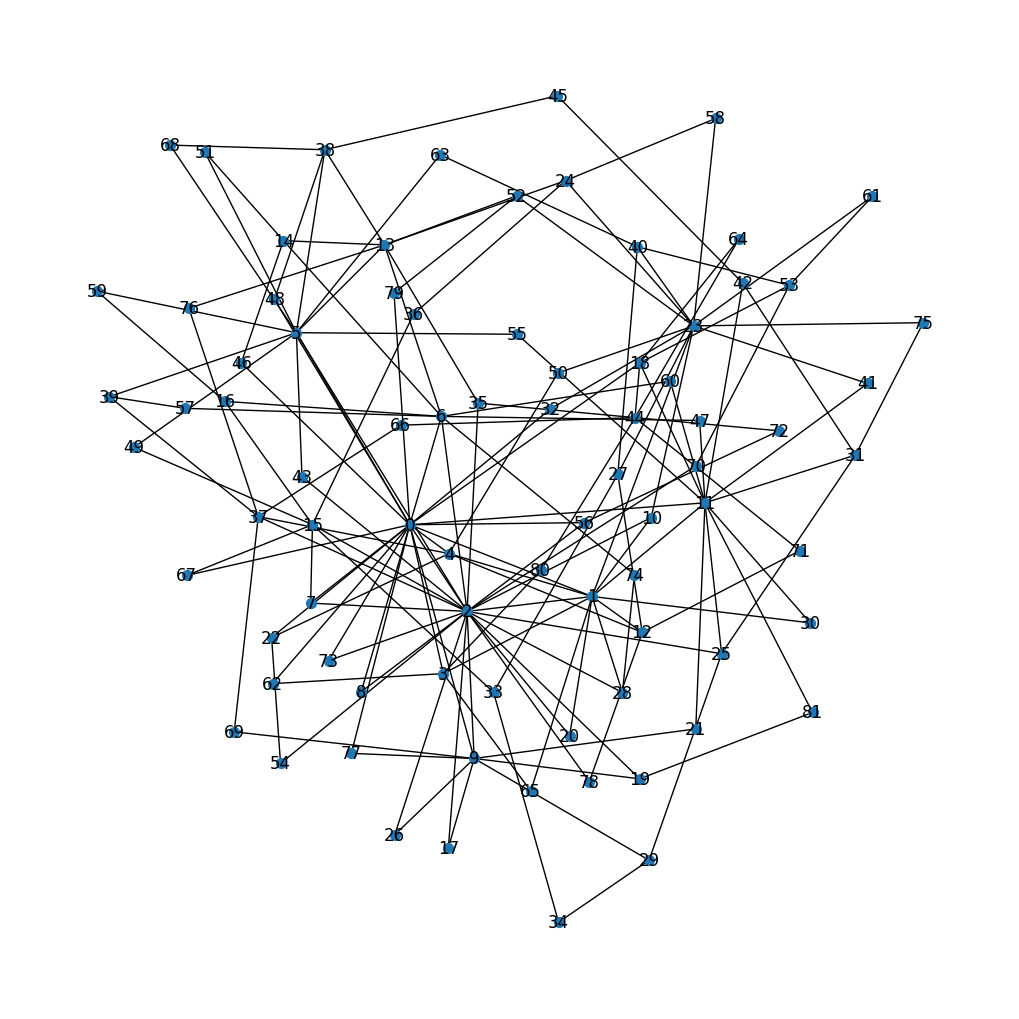

The average degree of the graph is: 3.93


In [85]:
m = round(avg_degree_myg)//2
print(m)

# Use the number of rows in df_nodes as the number of nodes
N = len(df_nodes)

# Generate the graph
G_pa = preferential_attachment(N, m)

# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw(G_pa, with_labels=True, node_size=50)
plt.show()

degrees = [deg for node, deg in nx.degree(G_pa)]

# Calculate the average degree
average_degree = sum(degrees) / len(degrees)

print(f"The average degree of the graph is: {average_degree:.2f}")

### d) Comparison of our graph against PA graph using: Degree distribution, Average Clustering, and Transitivity

Clustering coefficient measures the likelihood that two neighbors of a node are also neighbors of each other while transitivity is a related concept, providing a global measure of the clustering in the entire network. These metrics are useful for understanding the tendency of nodes to form tightly knit groups or clusters. Futhermore, real-world networks often exhibit higher clustering coefficients compared to random graphs, which have lower clustering due to their random nature. Which is very useful as a "test" of our accuracy. 

In [87]:

# For Clustering Coefficient and Transitivity
avg_clustering_real = nx.average_clustering(G_my)
transitivity_real = nx.transitivity(G_my)

avg_clustering_pa = nx.average_clustering(G_pa)
transitivity_pa = nx.transitivity(G_pa)

print("Real Graph - Average Clustering:", avg_clustering_real, "Transitivity:", transitivity_real)
print("PA Graph - Average Clustering:", avg_clustering_pa, "Transitivity:", transitivity_pa)



Real Graph - Average Clustering: 0.5990508780501607 Transitivity: 0.11465603190428714
PA Graph - Average Clustering: 0.23169850357018967 Transitivity: 0.09749303621169916


Degree distribution is a fundamental property of a graph, indicating how connections are distributed among nodes. In real-world networks, degree distribution often follows a power-law, especially in networks that grow via a mechanism similar to preferential attachment. What can be somehow seen from our example, because degree distributions are similarly shaped with degree distribution of our graph having huger range. 

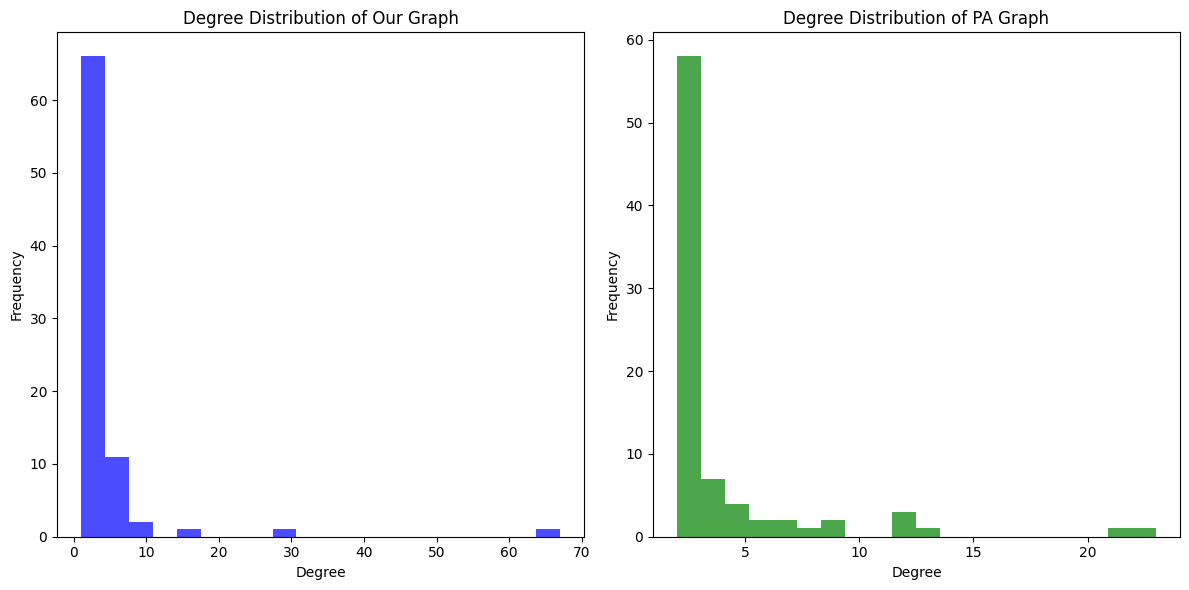

In [86]:
degrees_real = [G_my.degree(n) for n in G_my.nodes()]
degrees_pa = [G_pa.degree(n) for n in G_pa.nodes()]

# Plotting degree distribution for the real-world graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(degrees_real, bins=20, color='blue', alpha=0.7)
plt.title('Degree Distribution of Our Graph')
plt.xlabel('Degree')
plt.ylabel('Frequency')

# Plotting degree distribution for the PA graph
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(degrees_pa, bins=20, color='green', alpha=0.7)
plt.title('Degree Distribution of PA Graph')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()